### Treasury API Example

In [1]:
%config Completer.use_jedi = False
import requests
import pandas as pd
import numpy as np

In [58]:
url = 'https://api.fiscaldata.treasury.gov/services/api/fiscal_service'
endpt = '/v1/accounting/mts/mts_table_9'
param = '?filter=classification_desc:in:(Individual Income Taxes,Total)&page[size]=300'

r = requests.get(f'{url}{endpt}{param}')

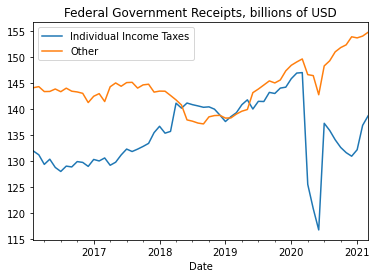

In [100]:
data = [(i['record_date'], 
         i['classification_desc'], 
         i['current_month_rcpt_outly_amt'],
         i['src_line_nbr']) 
         for i in r.json()['data']]

df = pd.DataFrame(data).set_index(0)
df.index = pd.to_datetime(df.index)
df.columns = ['Name', 'Value', 'LN']
df.index.name = 'Date'

result = (df.query('Name != "Total" or LN != "33"')
            .reset_index().set_index(['Date', 'Name'])['Value']
            .unstack().astype('float') / 1_000_000_000)

result['Other'] = result['Total'] - result['Individual Income Taxes']
result.columns.name = None
title = 'Federal Government Receipts, billions of USD'
result.drop('Total', axis=1).rolling(12).mean().dropna().plot(title=title);